In [1]:
import pickle
from fuzzywuzzy import fuzz
import numpy as np
import re
import math

dat = pickle.load(open("../emdb_metadata.pkl", 'rb'))
all_topics = pickle.load(open("../emdb_topics.pkl", 'rb'))


topics_proc = [None] * len(dat) 
dist_mat = np.zeros([len(dat), len(dat)])
all_topics = sorted(all_topics)

common_species_list = ['human', 'mouse', 'e. coli', 'escherichia coli']

for i,t in all_topics:
    topics_proc[i]  = [x.lower() for x in re.split(r'[^a-zA-Z0-9().]{2,}|\n|[^\S ]', t.replace(',','').replace('json','')) if len(x) > 0 and x.count(' ') < 7 and x.lower() not in ['dna', 'rna', 'protein', 'complex']]

    # Remove duplicates and topics that are substrings of other topics
    topics_to_remove = set()
    unique_topics = list(dict.fromkeys(topics_proc[i]))  # Remove exact duplicates first
    
    for topic1 in unique_topics:
        for topic2 in unique_topics:
            if topic1 != topic2 and topic1 in topic2:
                topics_to_remove.add(topic1)
    
    topics_proc[i] = [t for t in unique_topics if t not in topics_to_remove]

    if len(topics_proc[i]) == 0:
        continue

    for j in range(i):
        if len(topics_proc[j]) == 0:
            continue

        dist_scores = np.zeros((len(topics_proc[i]), len(topics_proc[j])))
        # Calculate fuzzy match scores between all topic pairs
        for ti, topic1 in enumerate(topics_proc[i]):
            for tj, topic2 in enumerate(topics_proc[j]):

                if topic1 == topic2 and topic1 in common_species_list: # don't let species overlap alone contribute a high match
                    continue
                    
                dist_scores[ti,tj] = fuzz.ratio(topic1, topic2) / 100.0 # * math.sqrt(len(topic1) + len(topic2))
                

        dist = (dist_scores.max(axis=1).mean() + dist_scores.max(axis=0).mean()) / 2
        dist_mat[i, j] = dist
        dist_mat[j, i] = dist  # Since the distance is symmetric

    print(i)

dist_mat[dist_mat < 0.5] = 0
dist_mat.mean()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

IOStream.flush timed out


2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703
2704
2705
2706
2707
2708
2709
2710
2711
2712
2713
2714
2715
2716
2717
2718
2719
2720
2721
2722
2723
2724
2725
2726
2727
2728
2729
2730
2731
2732
2733
2734
2735
2736
2737
2738
2739
2740
2741
2742
2743
2744
2745
2746
2747
2748
2749
2750
2751
2752
2753
2754
2755
2756
2757
2758
2759
2760
2761
2762
2763
2764
2765
2766
2767
2768
2769
2770
2771
2772
2773
2774
2775
2776
2777
2778
2779
2780
2781
2782
2783
2784
2785
2786
2787
2788
2789
2790
2791
2792
2793
2794
2795
2796
2797
2798
2799
2800
2801
2802
2803


IOStream.flush timed out


2804
2805
2806
2807
2808
2809
2810
2811
2812
2813
2814
2815
2816
2817
2818
2819
2820
2821
2822
2823
2824
2825
2826
2827
2828
2829
2830
2831
2832
2833
2834
2835
2836
2837
2838
2839
2840
2841
2842
2843
2844
2845
2846
2847
2848
2849
2850
2851
2852
2853
2854
2855
2856
2857
2858
2859
2860
2861
2862
2863
2864
2865
2866
2867
2868
2869
2870
2871
2872
2873
2874
2875
2876
2877
2878
2879
2880
2881
2882
2883
2884
2885
2886
2887
2888
2889
2890
2891
2892
2893
2894
2895
2896
2897
2898
2899
2900
2901
2902
2903
2904
2905
2906
2907
2908
2909
2910
2911
2912
2913
2914
2915
2916
2917
2918
2919
2920
2921
2922
2923
2924
2925
2926
2927
2928
2929
2930
2931
2932
2933
2934
2935
2936
2937
2938
2939
2940
2941
2942
2943
2944
2945
2946
2947
2948
2949
2950
2951
2952
2953
2954
2955
2956
2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003


0.00600435444995973

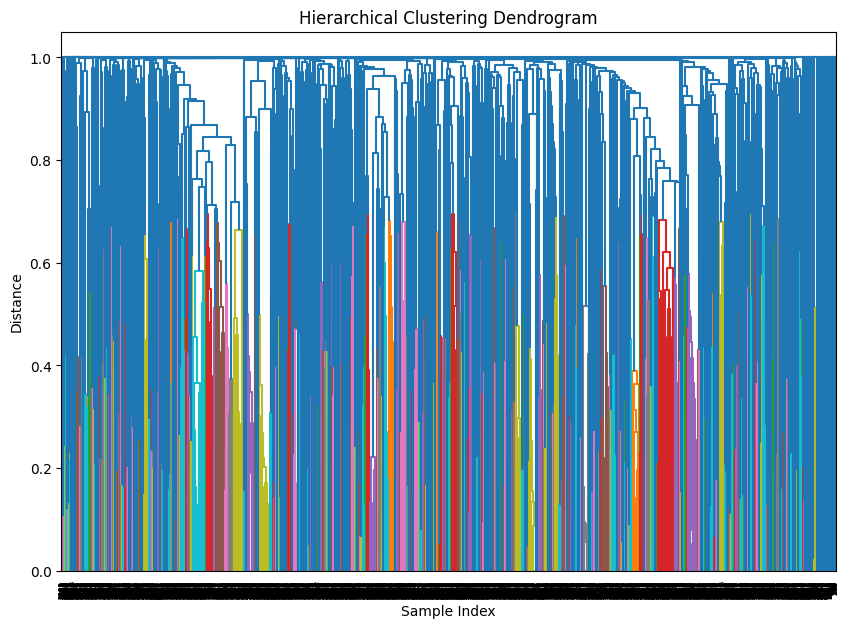

In [2]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

dist_inv = 1 - dist_mat
np.fill_diagonal(dist_inv, 0)

linkage_matrix = sch.linkage(squareform(dist_inv), method='average')

plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [3]:
from collections import defaultdict

cluster_labels = sch.fcluster(linkage_matrix, 0.35, criterion='distance')

# Convert labels into list of lists of indices
clusters = defaultdict(list)
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

# Convert dictionary to list of lists
cluster_list = sorted(list(clusters.values()), key=lambda x:len(x), reverse=True)

In [4]:
summ = []
for c in cluster_list:
    print((topics_proc[c[0]], topics_proc[c[-1]], len(c)))
    summ.append((topics_proc[c[0]], len(c)))

(['human sperm', 'dmt', 'microtubule'], ['mouse', 'sperm', 'dmt', 'microtubule'], 47)
(['40s ribosomal small subunit', 'hcv ires', 'delta dii ires', 'eif2', '48s initiation complex'], ['40s ribosomal small subunit', 'hcv ires', '40s ribosome'], 37)
(['respiratory complex i', 'q10-nadh'], ['respiratory complex i', 'dq-nadh'], 33)
(['v/a-atpase', 'thermus thermophilus'], ['v/a-atpase', 'thermus thermophilus', 'v1eg'], 31)
(['apoferritin', 'equine spleen', 'horse spleen'], ['human apoferritin'], 30)
(['cyddc heterodimer', 'cyddc mutant (e500q.c)', 'amp-pnp(cydc)', 'amp-pnp(cydd)', 'heme'], ['cyddc heterodimer', 'cyddc mutant (e500q.c)', 'atp(cydc)'], 27)
(['nadh ubiquinone oxidoreductase (complex i)', 'bovine complex i', 'im1761092'], ['nadh ubiquinone oxidoreductase', 'bovine complex i', 'im1761092', 'hydrophilic domain'], 27)
(['sars-cov-2 spike protein variant d614g', 'sars-cov-2 spike d614g', 'rbd'], ['sars-cov-2 spike protein', 'rbd'], 25)
(['cand1', 'scf', 'fbxo6'], ['cand1', 'scf-s

In [6]:
import torch
import numpy as np
from cryodrgn.source import ImageSource
import os
import pickle
import torch

dat = torch.load("../train_projections.pt")
ids = dat['ids']
images = dat['images']
phis = dat['phis']
thetas = dat['thetas']

dat_val = torch.load("../val_projections.pt")
ids_val = dat_val['ids']
images_val = dat_val['images']
phis_val = dat_val['phis']
thetas_val = dat_val['thetas']

images_all = torch.cat([images, images_val])
images_all = torch.clamp((images_all - images_all.mean(dim=(-1,-2), keepdim=True)) / images_all.std(dim=(-1,-2), keepdim=True), -5, 15)


/tmp/ipykernel_1091043/530340760.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dat = torch.load("../train_projections.pt")
/tmp/ipykernel_1091043/530340760.py:14: Futu

(<Figure size 300x150 with 2 Axes>,
 array([<AxesSubplot: >, <AxesSubplot: >], dtype=object))

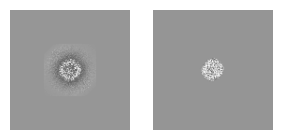

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_projections(imgs, labels=None, max_imgs=25):
    if len(imgs) > max_imgs:
        imgs = imgs[:max_imgs]

    N = len(imgs)
    nrows = 1
    ncols = N

    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols, figsize=(1.5 * ncols, 1.5 * nrows)
    )

    if not isinstance(axes, np.ndarray):
        axes = np.array([[axes]])
    if labels is None:
        labels = [None for _ in axes.ravel()]

    for img, ax, lbl in zip(imgs, axes.ravel(), labels):
        ax.imshow(img, vmin=-15, vmax=15,cmap="Greys_r")
        if lbl is not None:
            ax.set_title(lbl)
        ax.axis("off")

    plt.tight_layout()
    return fig, axes

i = 4

plot_projections(torch.stack([images_all[cluster_list[i][0],0], images_all[cluster_list[i][-1],0]]))

In [164]:
import random
dat = pickle.load(open("../emdb_metadata.pkl", 'rb'))

ids_all = torch.cat([ids, ids_val])
i = 105
titles = [dat[x]['title'] + " : " + dat[x]['name'] + " : " + dat[x]['emd_id'] for x in cluster_list[i]]
random.shuffle(titles)
print("\n".join(titles[:10]))

Hsp90:Cdc37:CRaf complex : Hsp90:Cdc37:CRaf complex : EMD-29949
CryoEM structure of HSP90-CDC37-BRAF(V600E) complex. : HSP90-CDC37-BRAF(V600E) complex : EMD-14875
PP5 bound to Hsp90:Cdc37:CRaf complex : Hsp90:Cdc37:CRaf complex bound to PP5. : EMD-/home/gridsan/jroney/projections/emd_29973

Hsp90 provides platform for CRaf dephosphorylation by PP5 : Hsp90:Cdc37:CRaf:PP5 complex : EMD-29895
CryoEM structure of HSP90-CDC37-BRAF(V600E)-PP5(open) complex : HSP90-CDC37-BRAF(V600E)-PP5(open) complex : EMD-14884
Hsp90 provides platform for CRaf dephosphorylation by PP5 : Hsp90:Cdc37:CRaf:PP5 complex : EMD-29984


In [60]:
dat[0]

{'emd_id': 'EMD-25981',
 'name': 'closed conformation of SthK bound to cAMP',
 'organism': ['Spirochaeta thermophila (strain ATCC 700085 / DSM 6578 / Z-1203)'],
 'title': 'SthK closed state, cAMP-bound in the presence of detergent'}

In [73]:
ids_all.max()

tensor(41055)

In [165]:
[x in ids_all.tolist() for x in [45801, 18055, 41618, 44116, 48019, 39175, 47628, 37860, 47196, 41711, 41816]]

[False, False, False, False, False, False, False, False, False, False, False]